## LEAD SCORING CASE Study Assignment

### Importing the Libraries & Read the data

In [2]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv('Leads.csv')

### Analyzing the data

In [5]:
df.head(10)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API   
8  cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624  Landing Page Submission   
9  af465dfc-7204-4130-9e05-33231863c4b5       660616                      API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   
5      Olark Chat           No          No          0          0.0   
6          Google           No          No          1          2.0   
7      Olark Chat           No          No          0          0.0   
8  Direct Traffic           No          No          0          2.0   
9          Google           No          No          0          4.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   
5                            0                   0.0  Olark Chat Conversation   
6                         1640                   2.0             Email Opened   
7                            0                   0.0  Olark Chat Conversation   
8                           71                   2.0             Email Opened   
9                           58                   4.0             Email Opened   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   
5     NaN                      NaN                                NaN   
6   India  Supply Chain Management                      Online Search   
7     NaN                      NaN                                NaN   
8   India   IT Projects Management                                NaN   
9   India       Finance Management                      Word Of Mouth   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   
5                             NaN   
6                      Unemployed   
7                             NaN   
8                             NaN   
9                             NaN   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No      

In [6]:
df.shape

(9240, 37)

In [7]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Insight: Some variables have very high number of Missing values.

In [9]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### Insight: Some variables here have a high data variability. which is pointing towards outliers.

In [12]:
# Checking for duplicates and dropping the entire duplicate row if any
df.drop_duplicates(subset=None, inplace=True)

In [13]:
df.shape

(9240, 37)

#### There are no duplicate values.

### Checking Outliers in continuous variable

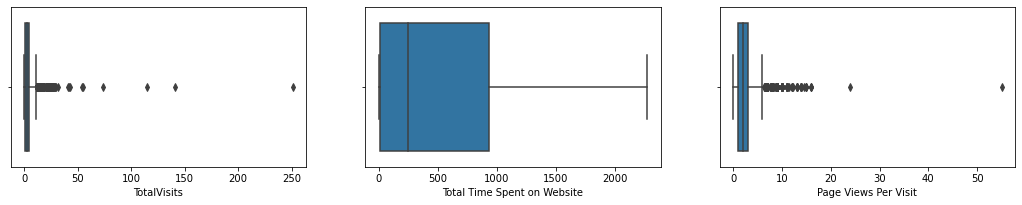

In [14]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(df['TotalVisits'])
plt.subplot(3, 3, 2)
sns.boxplot(df['Total Time Spent on Website'])
plt.subplot(3, 3, 3)
sns.boxplot(df['Page Views Per Visit'])


### Data Validation

#### Data Value Count Check

In [18]:
# Checking the value_counts in every variables to understand the data better

#Creating a copy of the dataframe, without the first two unique value columns, as this will have unique values, and it doesn't make sense to do a value count on it.

df_dummy=df.iloc[:,2:]


for col in df_dummy:
    print(df_dummy[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
testone                 1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

#### INSIGHT: From the above value_counts, we could see that the below variables have highly IMBALANCED data. So these will not significantly contribute to our model results. Hence we will tag them to be dropped. - Magazine - Newspaper Article - X Education Forums - Newspaper - Digital Advertisement - Through Recommendations - Receive More Updates About Our Courses - Update me on Supply Chain Content - Get updates on DM Content - I agree to pay the amount through cheque - What matters most to you in choosing a course - Search - Do Not Call - Do Not Email - Country - What is your current occupation.

In [19]:
Drop_features_list = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country','What is your current occupation']


Drop_features_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation']

#### Prospect ID','Lead Number' won't make any significant contributions to our model results. Hence we will add them to the 'Drop_features_list'.

In [20]:
#Adding the variables to Drop_features_list

Drop_features_list.append('Prospect ID')
Drop_features_list.append('Lead Number')
Drop_features_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

### Exploratory Data Analysis
#### Data Imbalance Percentage Check

In [21]:
# Calculating % of of Non Converted and Converted Leads in the Dataset

round(100*df['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    61.461
1    38.539
Name: Converted, dtype: float64

#### INSIGHT: Our Target variable is having a 62:38 ratio, and seems to be properly balanced with respect to the conversion ratio.

### Data Cleaning & Treatment:
     
Handling 'Select' values in the data:
During initial analysis (value_counts) , we could see that there are many variables having 'Select' as the categorical         values. These are values that customer has clearly missed to add, so we will consider them as NULL values. We will convert  all 'Select' to 'NaN'

In [22]:
#Checking unique value counts of City columns

df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
#Checking unique value counts of Specialization columns

df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
#Checking unique value counts of 'How did you hear about X Education' columns

df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [25]:
# Replace the 'Select with NaN'

df = df.replace('Select', np.nan)

#### Checking unique value counts of 'City', 'Specialization' and 'How did you hear about X Education' columns after removing 'Select' values

In [26]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [28]:
df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

#### Note: All the 'Select' values have been dealt and replaced with NaN

#### Checking the NULL Values again

In [29]:
#checking null values in each columns

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [30]:
#checking percentage of null values in each columns

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping columns which have more than 40% missing values

In [31]:
cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)

In [32]:
#checking null values percentage

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Taking a look at Categorical Variables

In [33]:
#Checking overall columns list to analyze

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Note: We won't analyze those columns which we have decided to drop and have put them in drop column list.

#### Handling 'Lead Origin' column

In [34]:
# Checking unique value counts 

df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

### We will perform univariate and Bivariate analyses on these categorical variables to check the impact of these variables on the Target variable

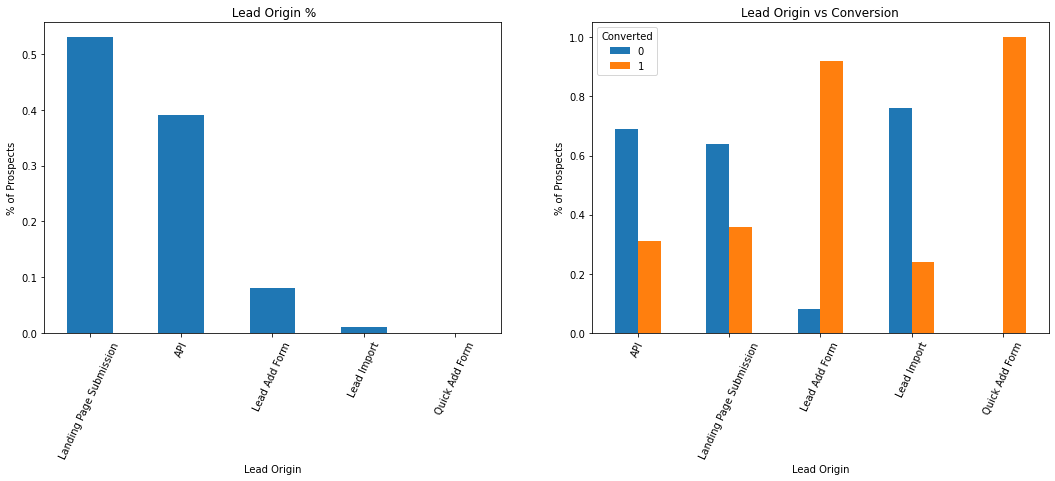

In [35]:
plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Lead Origin'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [36]:
# Checking unique value counts 

round(df['Lead Origin'].value_counts(normalize=True),3)

Landing Page Submission    0.529
API                        0.387
Lead Add Form              0.078
Lead Import                0.006
Quick Add Form             0.000
Name: Lead Origin, dtype: float64

In [37]:
print("Lead Origin v/s Convertion %")


print(round(pd.crosstab(df['Lead Origin'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

Lead Origin v/s Convertion %
Converted                   0     1
Lead Origin                        
API                      0.69  0.31
Landing Page Submission  0.64  0.36
Lead Add Form            0.08  0.92
Lead Import              0.76  0.24
Quick Add Form           0.00  1.00


#### INSIGHT: Univariate Analysis states that ~53% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API - While Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion. All calculations shown above.

#### Handling 'Lead Source' column

In [38]:
# Checking unique value counts 

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
testone                 1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

### Merging less frequent values of 'Lead Source' to 'Others' category
Looking at the proportions of various values in 'Lead Source' We could see there are columns which contain low frequent values in there. We will merge them into a new category 'Others'We will also merge 'google' to 'Google' as this seems like a typing error.

Earlier from our Null value check, we noted that 'Lead Source' has 36 NULL values. We will impute the NULL values with the MODE imputation, in this case 'Google'.

In [39]:
# Merging Google's into one category
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')


# Imputing Null with Google, as it is a Mode value.
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [40]:
# Checking unique value counts 

df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

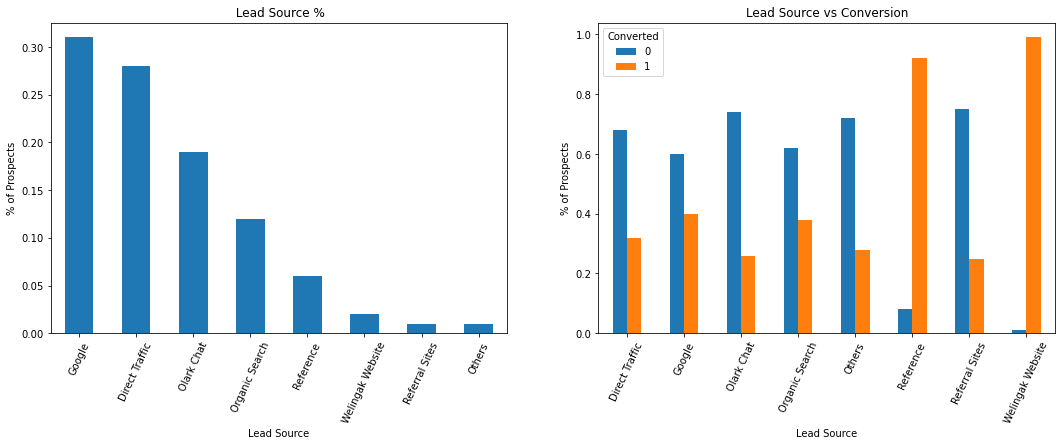

In [41]:
plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Lead Source'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Source %')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Lead Source'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Source vs Conversion')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [42]:
# Checking unique value counts 

round(df['Lead Source'].value_counts(normalize=True),3).sort_values(ascending = False)

Google              0.315
Direct Traffic      0.275
Olark Chat          0.190
Organic Search      0.125
Reference           0.058
Welingak Website    0.015
Referral Sites      0.014
Others              0.008
Name: Lead Source, dtype: float64

In [43]:
print("Lead Source v/s Convertion %")

print(round(pd.crosstab(df['Lead Source'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

Lead Source v/s Convertion %
Converted            0     1
Lead Source                 
Direct Traffic    0.68  0.32
Google            0.60  0.40
Olark Chat        0.74  0.26
Organic Search    0.62  0.38
Others            0.72  0.28
Reference         0.08  0.92
Referral Sites    0.75  0.25
Welingak Website  0.01  0.99


#### INSIGHT: - Univariate Analysis states that ~31% of the Lead Source is from 'Google' followed by ~28% from 'Direct Traffic' - Bivariate Analysis states that 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion. All calculations shown above.

#### Handling 'Last Activity' column

In [44]:
# Checking unique value counts

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

#### Merging less frequent values of 'Last Activity' to 'Others' category

Looking at the proportions of various values in 'Last Activity' We could see there are number of colimns having low frequent values in there. We will merge them into a new category 'Others'.

Earlier from our Null value check, we noted that 'Last Activity' has 103 NULL values. We will impute the NULL values with the MODE imputation, in this case 'Email Opened'.

In [45]:
# Imputing Null with Others, as it is generally Unknown sources

df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

# Merging low frequency items to Others
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [46]:
# Checking unique value counts 

df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

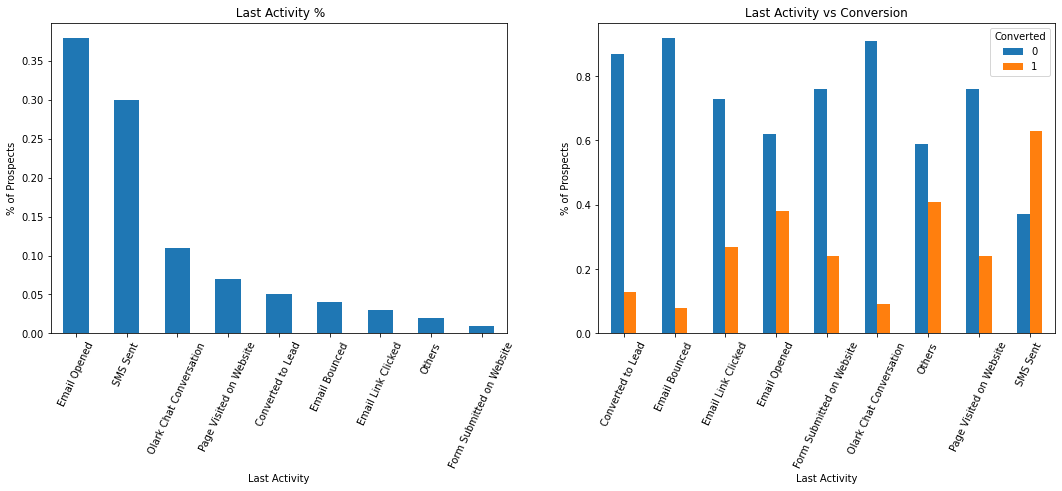

In [47]:
plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Last Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [48]:
# Checking unique value counts 

round(df['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Email Opened                 0.383
SMS Sent                     0.297
Olark Chat Conversation      0.105
Page Visited on Website      0.069
Converted to Lead            0.046
Email Bounced                0.035
Email Link Clicked           0.029
Others                       0.022
Form Submitted on Website    0.013
Name: Last Activity, dtype: float64

In [49]:
print("Last Activity v/s Convertion %")

print(round(pd.crosstab(df['Last Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

Last Activity v/s Convertion %
Converted                     0     1
Last Activity                        
Converted to Lead          0.87  0.13
Email Bounced              0.92  0.08
Email Link Clicked         0.73  0.27
Email Opened               0.62  0.38
Form Submitted on Website  0.76  0.24
Olark Chat Conversation    0.91  0.09
Others                     0.59  0.41
Page Visited on Website    0.76  0.24
SMS Sent                   0.37  0.63


#### INSIGHT: - Univariate Analysis states that ~38% of the Last Activity is from 'Email Opened' followed by ~28% from 'SMS Sent' - Bivariate Analysis states that 'Email Opened' as a Last Activity has 38% of Conversion and 'SMS Sent' has 63% of Conversion. All calculations shown above.

#### Handling 'Specialization' column

In [50]:
# Checking unique value counts 

df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

### Merging less frequent values of 'Specialization' to 'Others' category
Looking at the proportions of various values in 'Specialization' We could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'Specialization' has 3380 NULL values. We will impute the NULL values as 'Others' as not selecting a Specialization could mean that he or she has not worked in any industry earlier. So we will categorise them into Others.

In [51]:
# Imputing Null with Others, as it is generally Unknown sources
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['Specialization'] = df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')


In [52]:
# Checking unique value counts 

df['Specialization'].value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

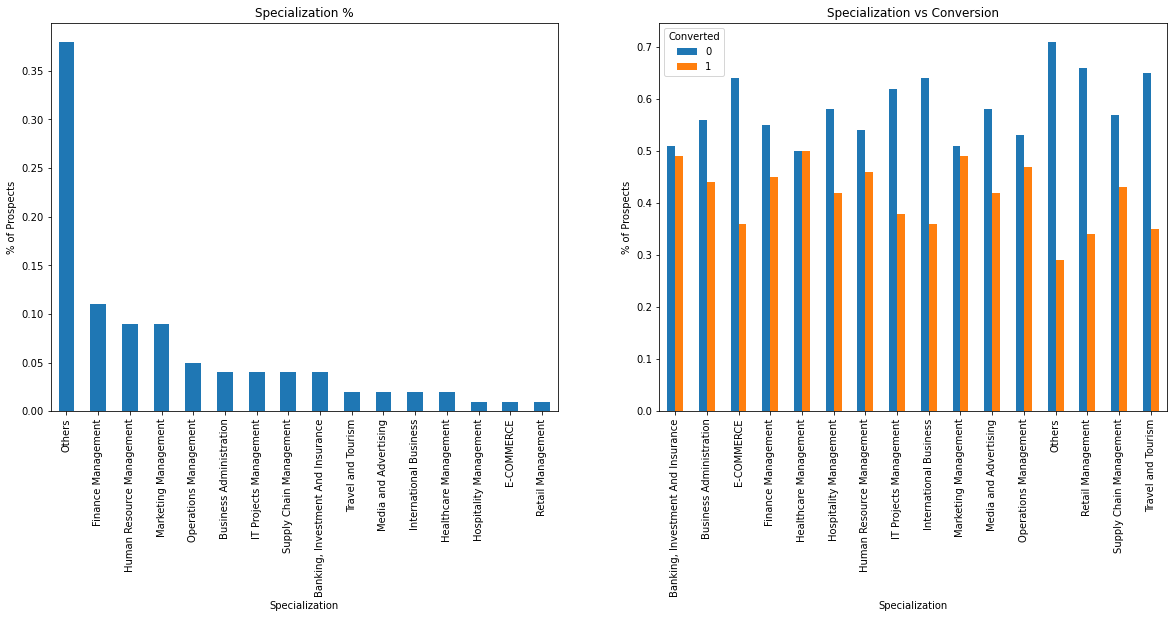

In [53]:
plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Specialization'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [54]:
# Checking unique value counts 

round(df['Specialization'].value_counts(normalize=True),3).sort_values(ascending = False)

Others                               0.384
Finance Management                   0.106
Human Resource Management            0.092
Marketing Management                 0.091
Operations Management                0.054
Business Administration              0.044
IT Projects Management               0.040
Supply Chain Management              0.038
Banking, Investment And Insurance    0.037
Media and Advertising                0.022
Travel and Tourism                   0.022
International Business               0.019
Healthcare Management                0.017
E-COMMERCE                           0.012
Hospitality Management               0.012
Retail Management                    0.011
Name: Specialization, dtype: float64

In [55]:
print("Specialization v/s Conversion %")

print(round(pd.crosstab(df['Specialization'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

Specialization v/s Conversion %
Converted                             0     1
Specialization                               
Banking, Investment And Insurance  0.51  0.49
Business Administration            0.56  0.44
E-COMMERCE                         0.64  0.36
Finance Management                 0.55  0.45
Healthcare Management              0.50  0.50
Hospitality Management             0.58  0.42
Human Resource Management          0.54  0.46
IT Projects Management             0.62  0.38
International Business             0.64  0.36
Marketing Management               0.51  0.49
Media and Advertising              0.58  0.42
Operations Management              0.53  0.47
Others                             0.71  0.29
Retail Management                  0.66  0.34
Supply Chain Management            0.57  0.43
Travel and Tourism                 0.65  0.35


#### INSIGHT: - Univariate Analysis states that ~40% of the Specialization is from 'Others' category, followed by ~10% from 'Finance Management' - Bivariate Analysis states that 'Finance Management' as a Specialization has 45% of Conversion and 'Human Resource Management' has 46% of Conversion. All calculations shown above.

#### Handling 'Tags' column

In [56]:
# Checking unique value counts 

df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Merging less frequent values of 'Tags' to 'Others' category
Looking at the proportions of various values in 'Tags' we could see there are few number of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'Tags' has 3353 NULL values. We will impute the NULL values with MODE, in this case as 'Unemployed'. As not selecting a 'What is your current occupation' could mean that he or she was Unemployed. So we will categorise them into 'Others' category.



In [57]:
# Imputing Null with Others, as it is generally Unknown sources
df['Tags'] = df['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['Tags'] = df['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

In [58]:
# Checking unique value counts 

df['Tags'].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

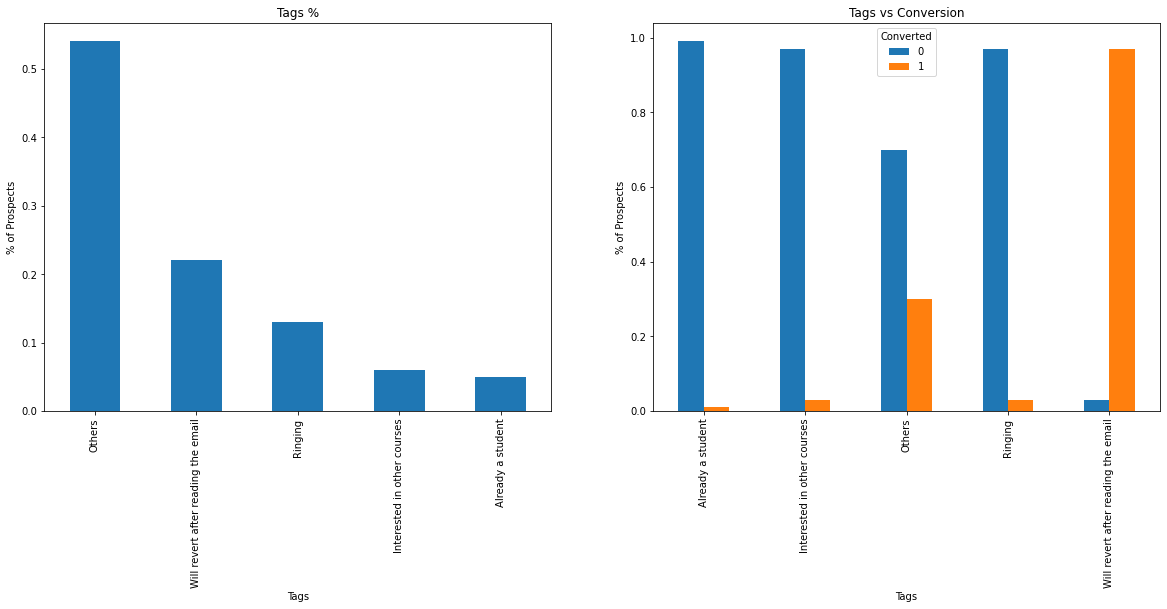

In [59]:
plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Tags'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [60]:
round(df['Tags'].value_counts(normalize=True),3).sort_values(ascending = False)

Others                                 0.540
Will revert after reading the email    0.224
Ringing                                0.130
Interested in other courses            0.056
Already a student                      0.050
Name: Tags, dtype: float64

In [61]:
print("Tags v/s Conversion %")

print(round(pd.crosstab(df['Tags'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Tags v/s Conversion %
Converted                               0     1
Tags                                           
Already a student                    0.99  0.01
Interested in other courses          0.97  0.03
Others                               0.70  0.30
Ringing                              0.97  0.03
Will revert after reading the email  0.03  0.97


#### INSIGHT: - Univariate Analysis states that ~54% of the Tags is from 'Others' category, followed by ~22% from 'Will revert after reading the email' - Bivariate Analysis states that 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion. All calculations shown above.

#### Handling 'City' column

In [62]:
# Checking unique value counts 

df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Merging less frequent values of 'City' to 'Others' category
Looking at the proportions of various values in 'City' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'City' has 3669 NULL values. We will also impute the NULL values with 'Others'.

In [63]:
# Imputing Null with Others, as it is generally Unknown sources
df['City'] = df['City'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['City'] = df['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [64]:
# Checking unique value counts 

df['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

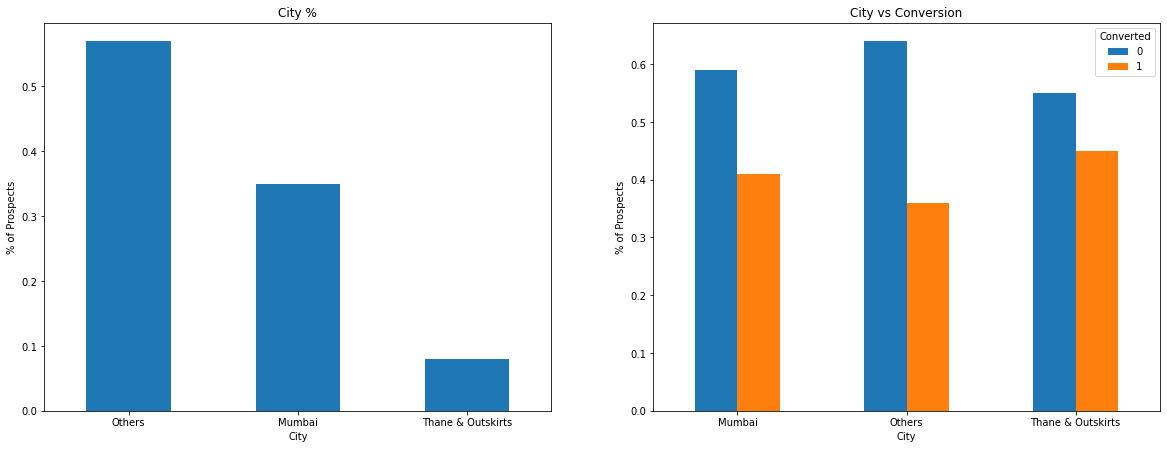

In [65]:
plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['City'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('City %')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['City'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('City vs Conversion')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [66]:
# Checking unique value counts 

round(df['City'].value_counts(normalize=True),3).sort_values(ascending = False)

Others               0.570
Mumbai               0.349
Thane & Outskirts    0.081
Name: City, dtype: float64

In [67]:
print("City v/s Conversion %")

print(round(pd.crosstab(df['City'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

City v/s Conversion %
Converted             0     1
City                         
Mumbai             0.59  0.41
Others             0.64  0.36
Thane & Outskirts  0.55  0.45


#### INSIGHT: - Univariate Analysis states that ~57% of the City is from 'Others' category, followed by ~35% from 'Mumbai' - Bivariate Analysis states that 'Mumbai' as a City has 41% of Conversion and 'Others' has 36% of Conversion. All calculations shown above.

#### Handling 'A free copy of Mastering The Interview' column

In [68]:
# Checking unique value counts 

df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

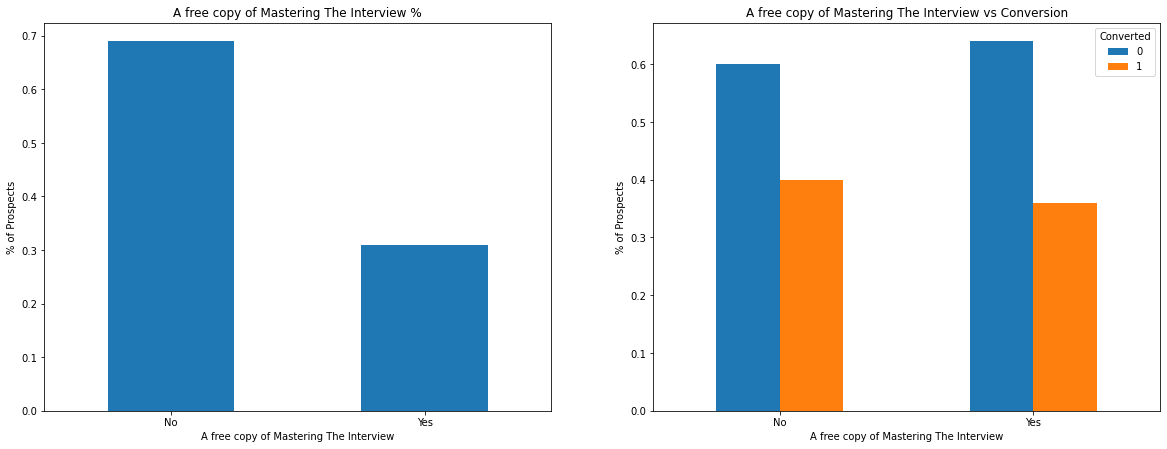

In [69]:
plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('A free copy of Mastering The Interview %')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['A free copy of Mastering The Interview'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('A free copy of Mastering The Interview vs Conversion')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [70]:
# Checking unique value counts 

round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),3).sort_values(ascending = False)

No     0.687
Yes    0.313
Name: A free copy of Mastering The Interview, dtype: float64

In [71]:
print("A free copy of Mastering The Interview v/s Conversion %")

print(round(pd.crosstab(df['A free copy of Mastering The Interview'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

A free copy of Mastering The Interview v/s Conversion %
Converted                                  0     1
A free copy of Mastering The Interview            
No                                      0.60  0.40
Yes                                     0.64  0.36


#### INSIGHT: - Univariate Analysis states that ~68% of the customer said they do not need 'A free copy of Mastering The Interview'. - Bivariate Analysis states that only ~36% of the people who said they need 'A free copy of Mastering The Interview' were converted. All calculations shown above.


#### Handling 'Last Notable Activity' column

In [72]:
# Checking unique value counts 

df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### Merging less frequent values of 'Last Notable Activity' to 'Others' category
Looking at the proportions of various values in 'Last Notable Activity' we could see there are few number of low frequent values in there. We will merge them into a new category 'Others'

In [73]:
# Merging low frequency items to Others
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

In [74]:
# Checking unique value counts 

df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

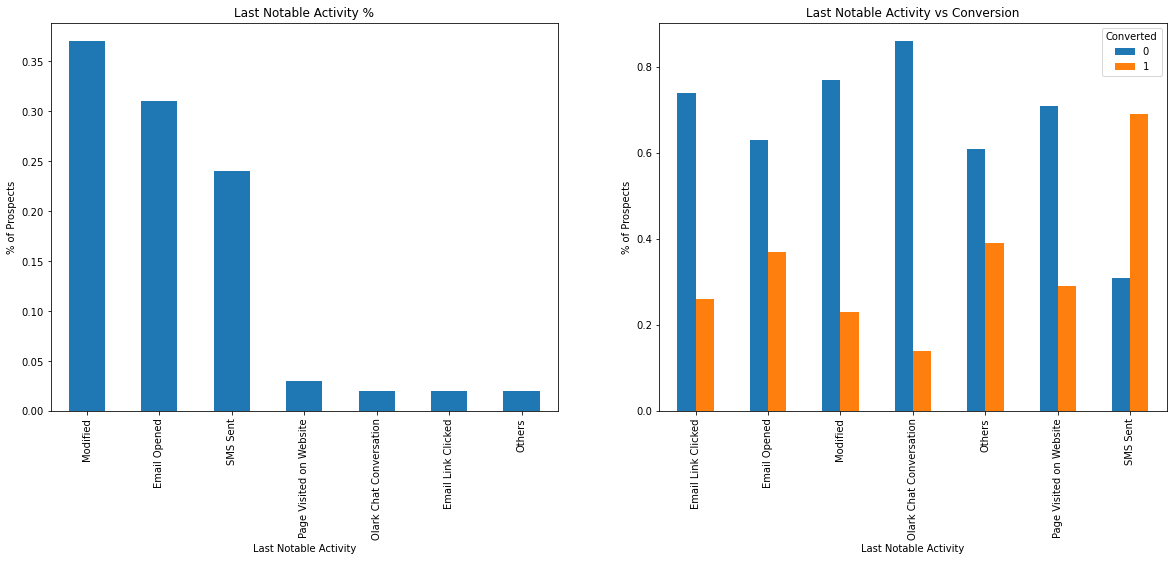

In [75]:
plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Last Notable Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [76]:
# Checking unique value counts 

round(df['Last Notable Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Modified                   0.369
Email Opened               0.306
SMS Sent                   0.235
Page Visited on Website    0.034
Olark Chat Conversation    0.020
Email Link Clicked         0.019
Others                     0.017
Name: Last Notable Activity, dtype: float64

In [77]:
print("Last Notable Activity v/s Conversion %")

print(round(pd.crosstab(df['Last Notable Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            

Last Notable Activity v/s Conversion %
Converted                   0     1
Last Notable Activity              
Email Link Clicked       0.74  0.26
Email Opened             0.63  0.37
Modified                 0.77  0.23
Olark Chat Conversation  0.86  0.14
Others                   0.61  0.39
Page Visited on Website  0.71  0.29
SMS Sent                 0.31  0.69


#### INSIGHT: - Univariate Analysis states that ~37% of the Last Notable Activity is 'Modified' category, followed by ~31% from 'Email Opened' - Bivariate Analysis states that 'Email Opened' has 37% of Conversion and 'Modified' has 23% of Conversion. All calculations shown above.

### Exploring Numerical Variables & Treatment of Outliers

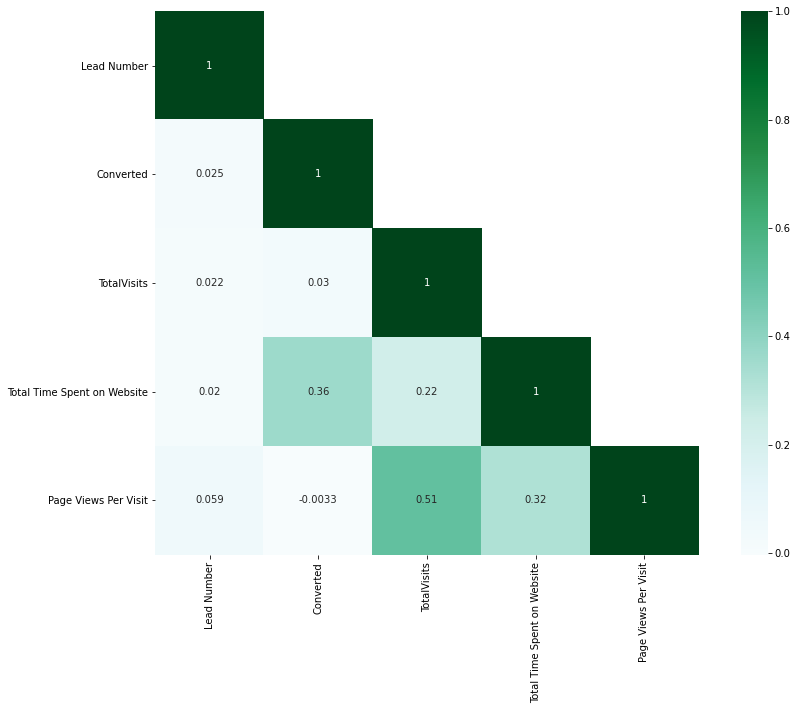

In [78]:
#Checking correlations between numeric variables

cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="BuGn")
plt.show()

#### INSIGHT: The Heat Map tells us that there is a strong correlation between 'TotalVisits' & 'Page View Per Visit'. We will handle this during our Multi Collinearity check.

In [79]:
#Checking overall columns list to analyse

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [80]:
# Getting all numerical variables
df_num = df.select_dtypes(exclude = 'object')
df_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [81]:
# Removing target variable which is 'Converted' and also 'Lead Number'
df_num = df_num.drop('Converted',axis=1)
df_num = df_num.drop('Lead Number',axis=1)
df_num.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Outliers Treatment

#### NOTE: For outliers Treatment, We have deployed the IQR CAPPING Method. That is we will identify the outlier in each of the numeric variable and impute them with IQR * 1.5. This will help us to remove the Outliers and also retain the rows.

In [82]:
Q1 = df_num.quantile(0.25)
Q1

TotalVisits                     1.0
Total Time Spent on Website    12.0
Page Views Per Visit            1.0
Name: 0.25, dtype: float64

In [83]:
Q3 = df_num.quantile(0.75)
Q3

TotalVisits                      5.0
Total Time Spent on Website    936.0
Page Views Per Visit             3.0
Name: 0.75, dtype: float64

In [84]:
IQR = Q3 - Q1
print(IQR)

TotalVisits                      4.0
Total Time Spent on Website    924.0
Page Views Per Visit             2.0
dtype: float64


In [85]:
IQR*1.5

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64

In [86]:
df_num.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9103.000000                  9240.000000           9103.000000
mean      3.445238                   487.698268              2.362820
std       4.854853                   548.021466              2.161418
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
max     251.000000                  2272.000000             55.000000

### Outliers Inspection

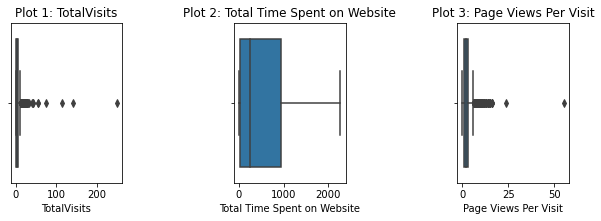

In [87]:
# Checking for outliers in all the numerical columns

plt.figure(figsize=(10,10))

for i in enumerate(df_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

#### NOTE: We could see that 'TotalVisits' and 'Page Views Per Visit' has Outliers. As mentioned in the Outlier handling Approach above, we will impute it using IQR*1.5

#### Handling 'TotalVisits' column

In [88]:
# Checking count of unique values

df['TotalVisits'].value_counts(bins=3)

(-0.252, 83.667]     9100
(83.667, 167.333]       2
(167.333, 251.0]        1
Name: TotalVisits, dtype: int64

In [89]:
# Checking statistical summary of TotalVisits

round(df['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64

Text(0, 0.5, '% of Users')

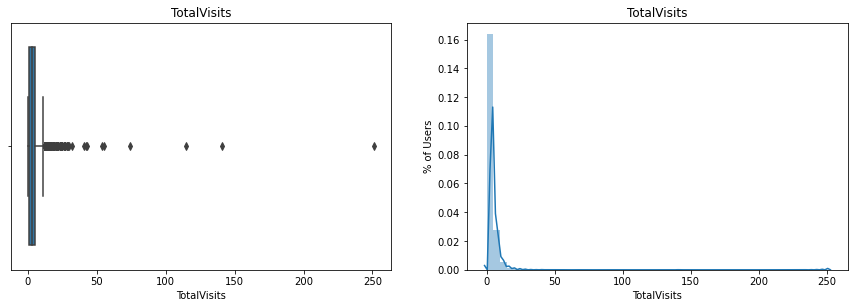

In [90]:
#Plotting before outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

In [91]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

df.loc[df['TotalVisits'] > 11, 'TotalVisits'] = 6

Text(0, 0.5, '% of Users')

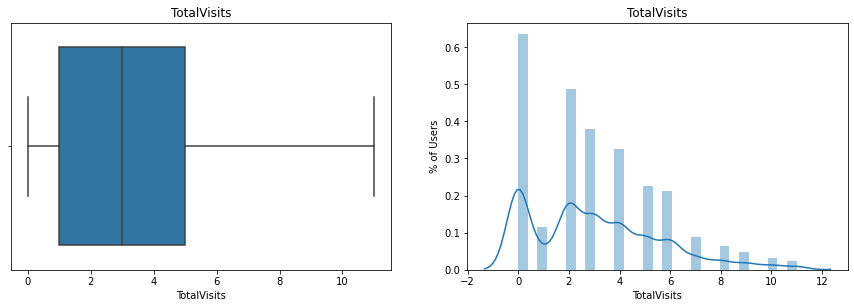

In [92]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

#### Handling 'Page Views Per Visit' column

In [93]:
# Checking unique value bins

df['Page Views Per Visit'].value_counts(bins=3)

(-0.056, 18.333]    9101
(36.667, 55.0]         1
(18.333, 36.667]       1
Name: Page Views Per Visit, dtype: int64

In [94]:
# Checking values at major percentiles

round(df['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
90%         5.00
99%         9.00
100%       55.00
max        55.00
Name: Page Views Per Visit, dtype: float64

Text(0, 0.5, '% of Users')

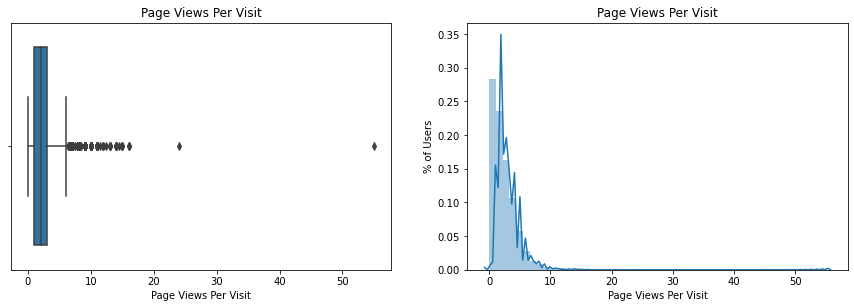

In [95]:
#Plotting before Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(df['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

In [96]:
# replacing the outlier (Q3 + 1.5*IQR) with 1.5*IQR

df.loc[df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

Text(0, 0.5, '% of Users')

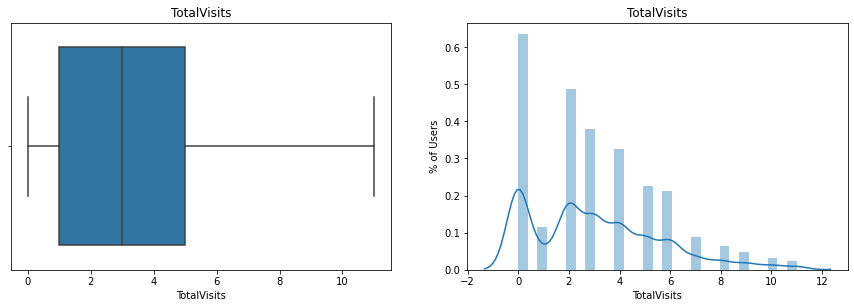

In [97]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

#### INSIGHT: All the outliers have been treated now.

In [98]:
df.shape

(9240, 30)

### Creating the final dataframe by excluding the 'Drop_features_list' columns

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [100]:
Drop_features_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

In [101]:
New_df=df[df.columns[~df.columns.isin(Drop_features_list)]]

In [102]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [103]:
#Checking shape of new dataframe

New_df.shape

(9240, 12)

### Checking the Null Values

In [104]:
New_df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [105]:
#checking percentage of null values in each columns

round(100*(New_df.isnull().sum()/len(New_df.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Dropping NULL value rows from the columns 'TotalVisits' & 'Page Views Per Visit'

In [106]:
New_df = New_df.dropna(subset=['Page Views Per Visit','TotalVisits'])

In [107]:
New_df.shape

(9103, 12)

In [108]:
#checking null values in each columns

New_df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### INSIGHT: All the Null Values have been removed, and we have our final dataframe. We will use this df for dummy value creation and standardization before building our final Model.

### Checking % of data retained

In [109]:
round((100*New_df.shape[0]/9240),2)

98.52

#### INSIGHT: Finally we retained ~99% of the data, which is Extremely good.

### Dummy Variable Creation

In [110]:
#checking for categorical variables with 2 classes. We need to identify them and convert them into integer before applying Dummy

for col in New_df:
    print(New_df[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64 

0    5642
1    3461
Name: Converted, dtype: int64 

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      733
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
Name: TotalVisits, dtype: int64 

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64 

0.00    2189
2.00    1795
3.00    1556
4.00     896
1.00     651
5.00     517
1.50     306
6.00     244
2.50     241
3.50      94
1.33      66
1.67      60

In [111]:
# Only 'A free copy of Mastering The Interview' variable has two class

var =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
New_df[var] = New_df[var].apply(binary_map)

In [112]:
# Checking count

New_df['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [113]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   Tags                                    9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

In [114]:
# Converting 'A free copy of Mastering The Interview' to Integer

New_df['A free copy of Mastering The Interview']=New_df['A free copy of Mastering The Interview'].astype("int64")

In [115]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   Tags                                    9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

#### INSIGHT: All necessary conversion and cleaning has been done before we apply our Dummy.

In [116]:
# Creating Dummy, deleting the first dummy and dropping the original:

New_df = pd.get_dummies(New_df, drop_first=True)

In [117]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9103 non-null   int64  
 1   TotalVisits                                    9103 non-null   float64
 2   Total Time Spent on Website                    9103 non-null   int64  
 3   Page Views Per Visit                           9103 non-null   float64
 4   A free copy of Mastering The Interview         9103 non-null   int64  
 5   Lead Origin_Landing Page Submission            9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                      9103 non-null   uint8  
 7   Lead Origin_Lead Import                        9103 non-null   uint8  
 8   Lead Source_Google                             9103 non-null   uint8  
 9   Lead Source_Olark Chat                         9103 

In [118]:
New_df.shape

(9103, 50)

## Test-Train Split

In [119]:
# Putting feature variable to X

X = New_df.drop(['Converted'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                             

In [120]:
# Putting response variable to y

Y = New_df['Converted']

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [121]:
# Splitting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

### Looking at Correlations

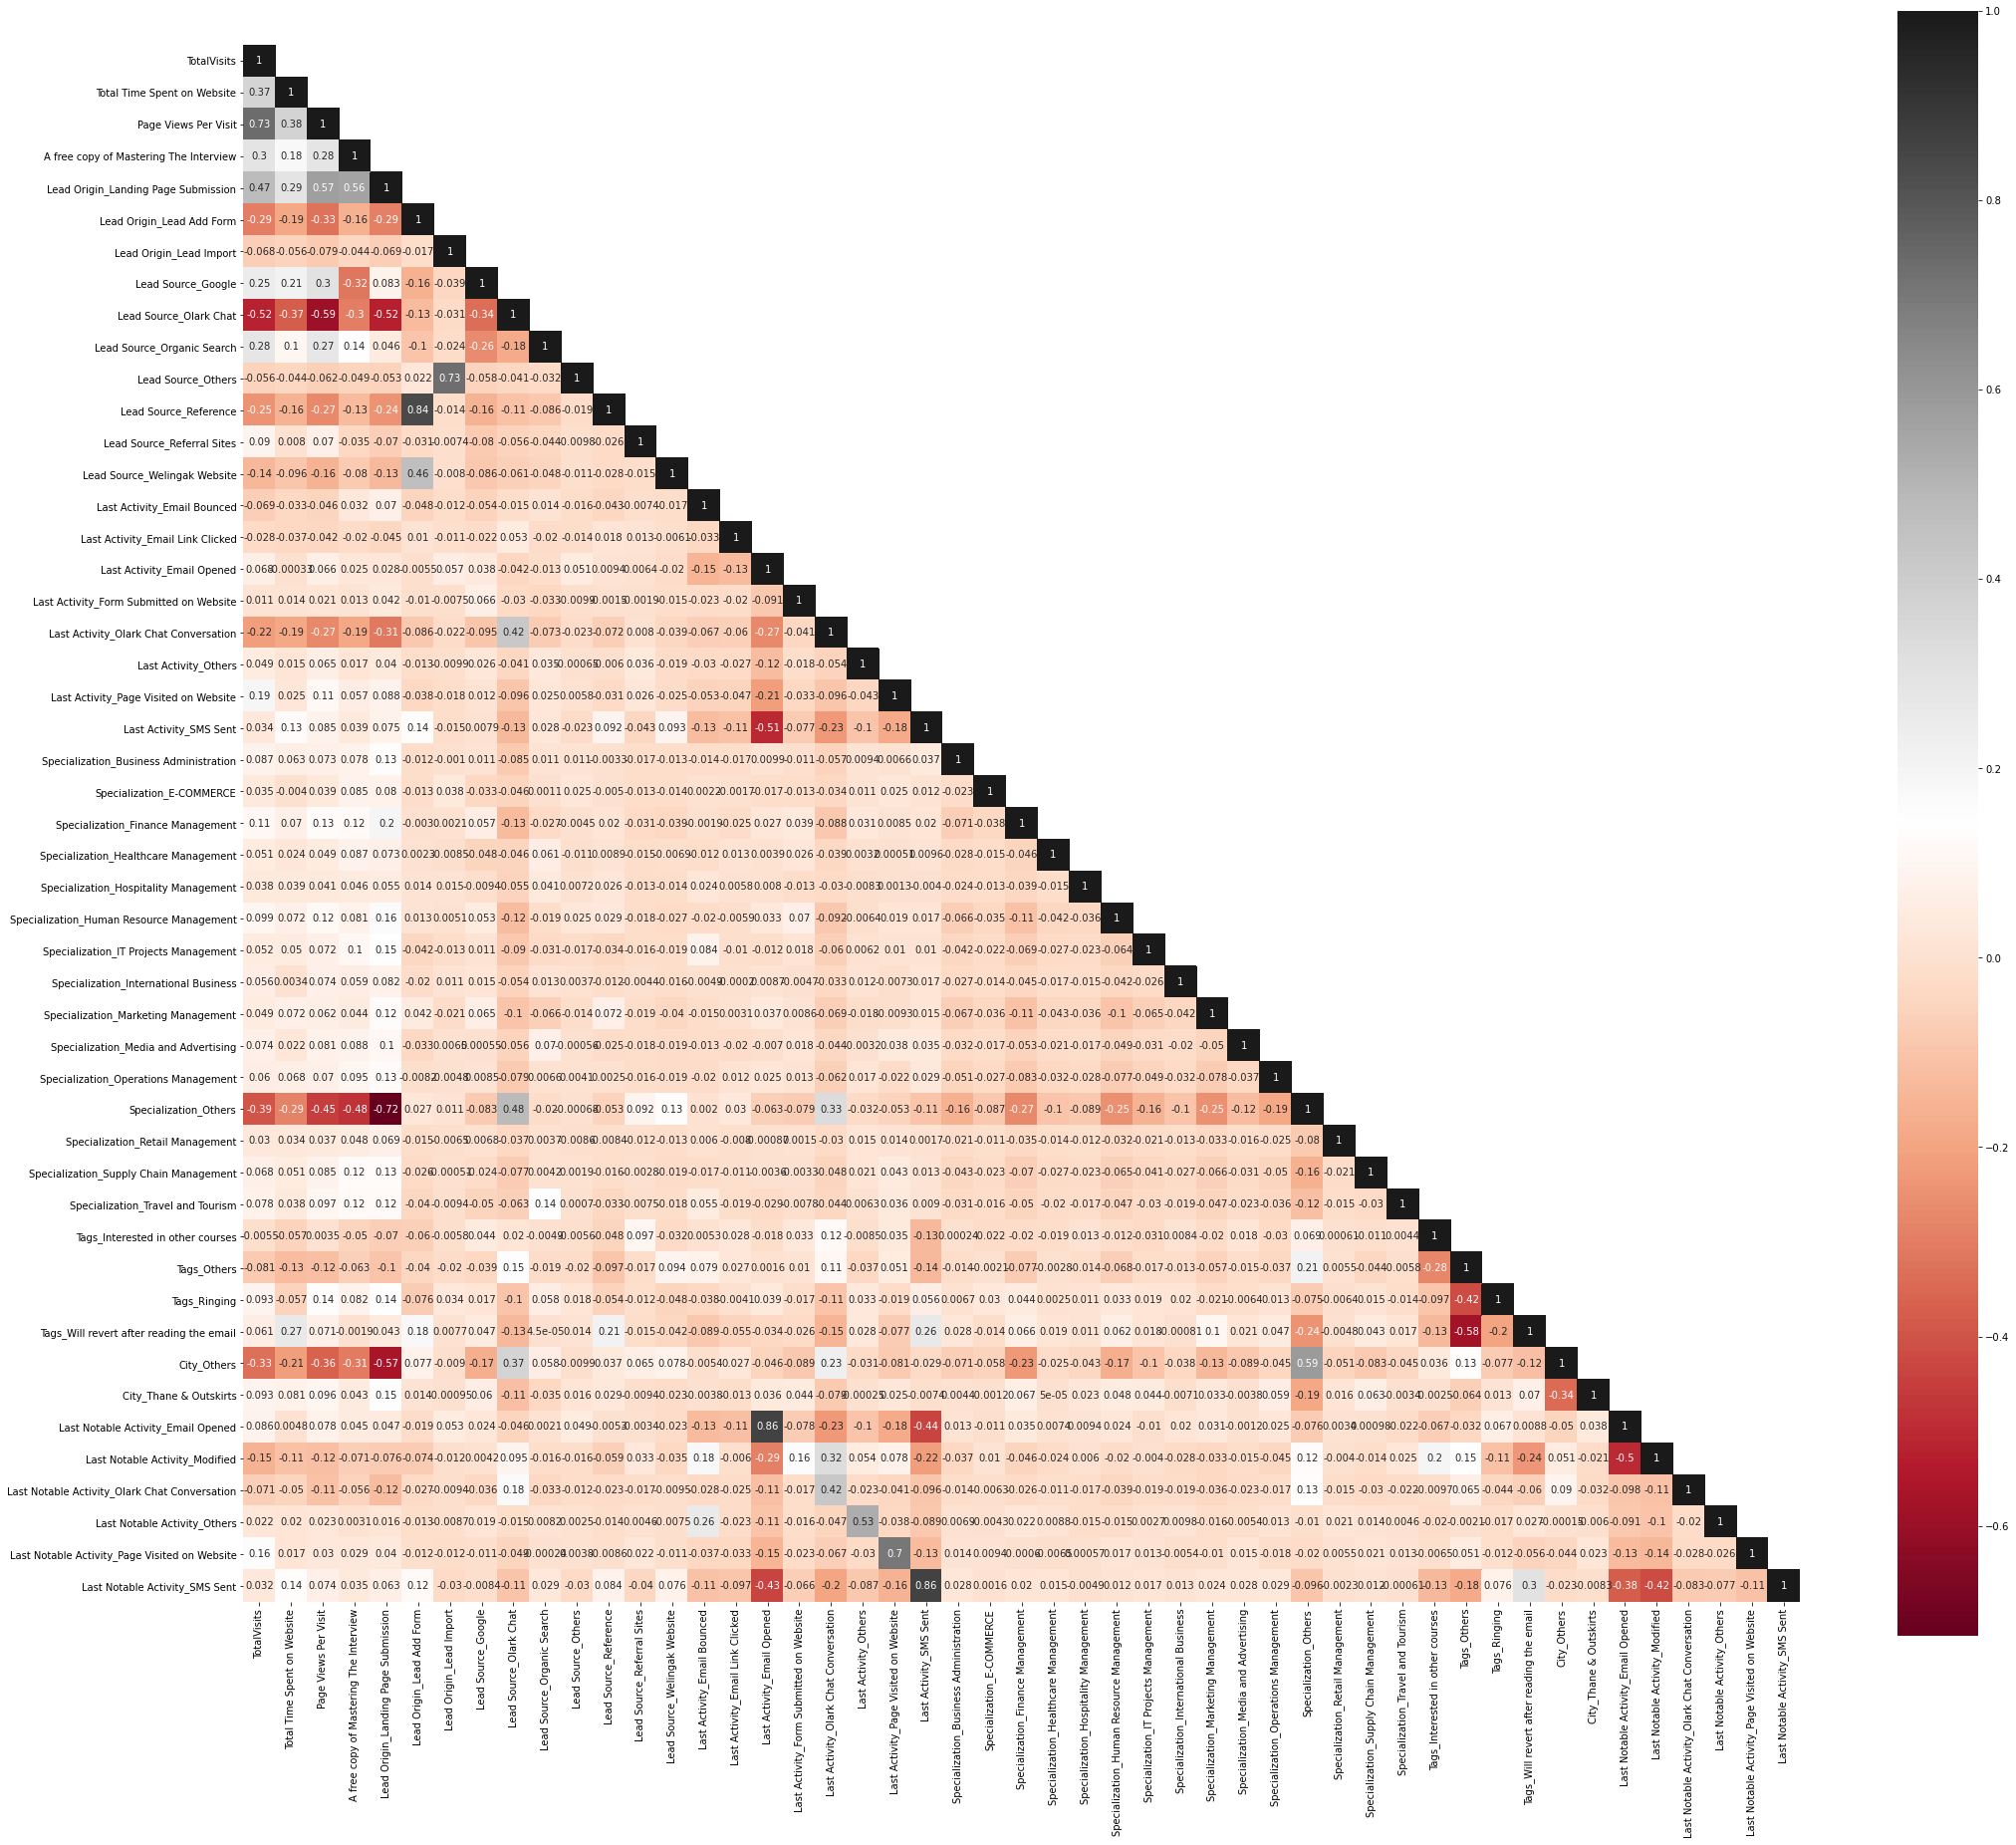

In [122]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

#### INSIGHT: There seems to be few highly correlated variables. We will remove all highly correlated variables above 0.4 'r value'

#### Dropping highly correlated dummy variables

In [123]:
X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

In [124]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 3504 to 5826
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               2731 non-null   float64
 1   Total Time Spent on Website               2731 non-null   int64  
 2   A free copy of Mastering The Interview    2731 non-null   int64  
 3   Lead Origin_Lead Add Form                 2731 non-null   uint8  
 4   Lead Origin_Lead Import                   2731 non-null   uint8  
 5   Lead Source_Google                        2731 non-null   uint8  
 6   Lead Source_Organic Search                2731 non-null   uint8  
 7   Lead Source_Referral Sites                2731 non-null   uint8  
 8   Last Activity_Email Bounced               2731 non-null   uint8  
 9   Last Activity_Email Link Clicked          2731 non-null   uint8  
 10  Last Activity_Email Opened       

### Checking the Correlation Matrix

#### After dropping highly correlated variables now let's check the correlation matrix again.

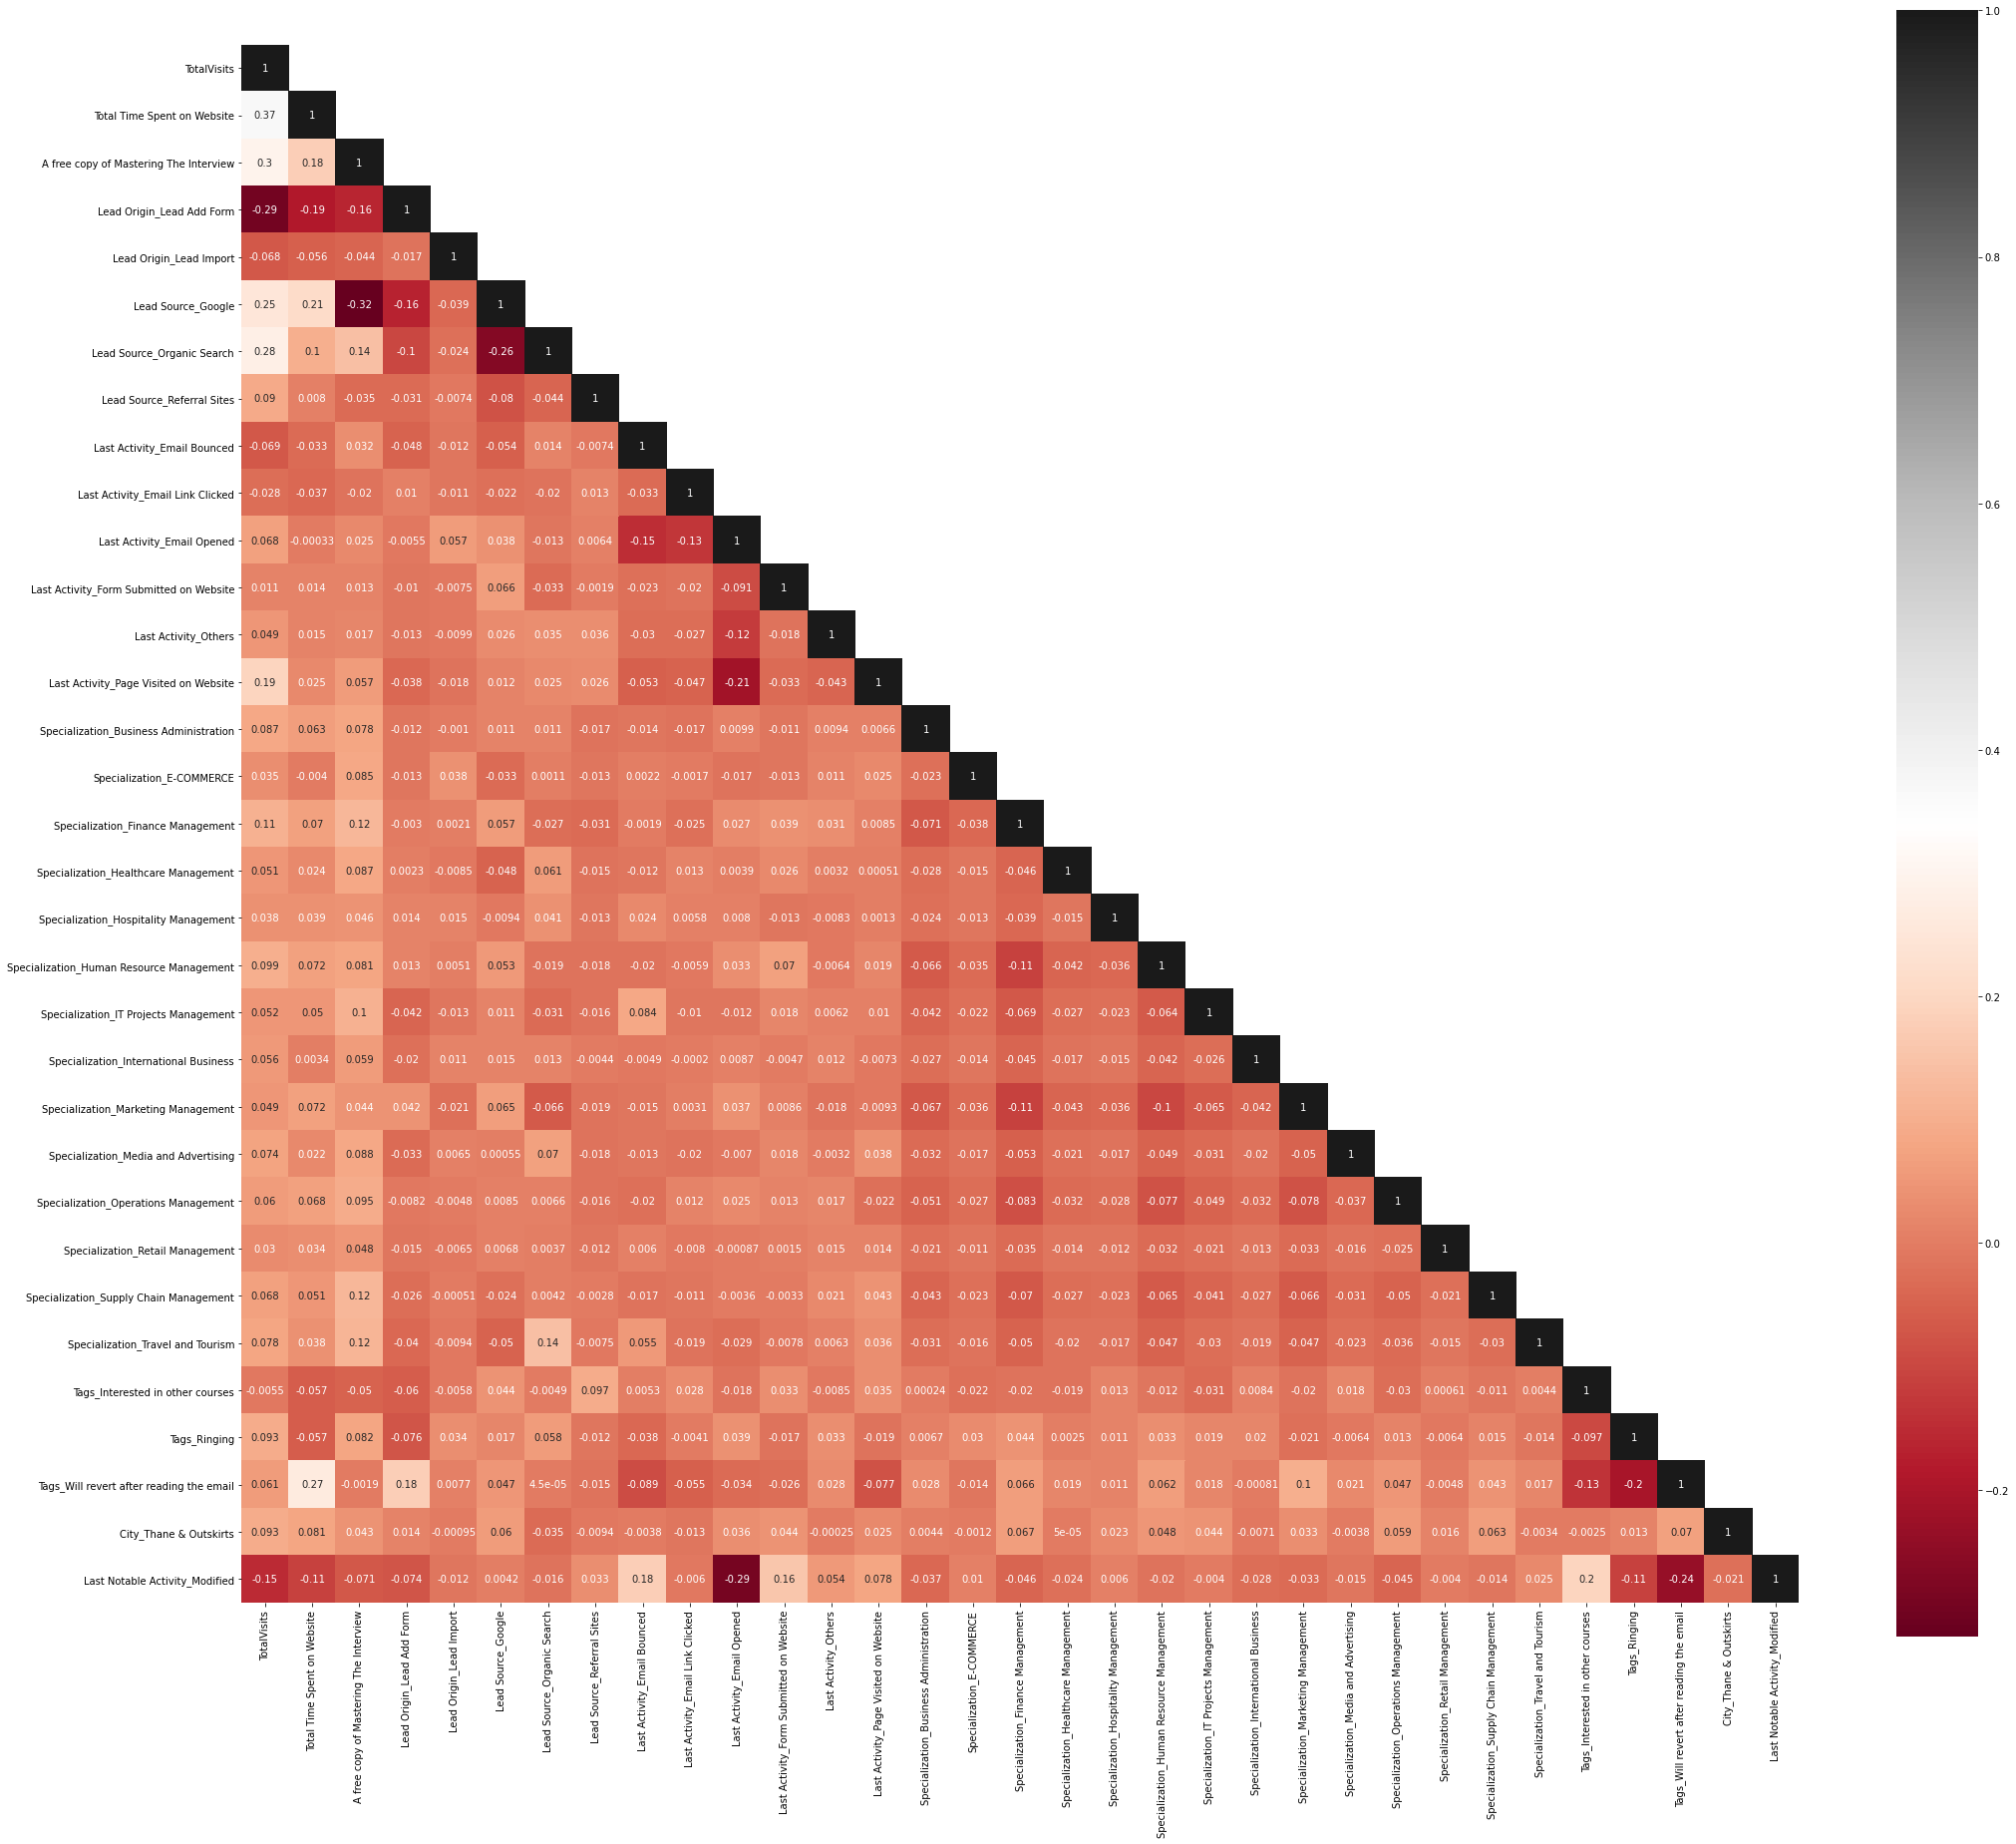

In [125]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

### Feature Scaling

In [126]:
X_train.head()

TotalVisits  Total Time Spent on Website  \
7962          3.0                         1286   
5520          7.0                           60   
1962          5.0                          169   
1566          6.0                         1241   
9170          0.0                            0   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
7962                                       0                          0   
5520                                       0                          0   
1962                                       0                          0   
1566                                       0                          0   
9170                                       0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
7962                        0                   1                           0   
5520                        0                   0                           0   
1962                        0                   1                           0   
1566                        0                   1                           0   
9170                        0                   0                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
7962                           0                            0   
5520                           0                            0   
1962                           0                            0   
1566                           0                            0   
9170                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
7962                                 0                           0   
5520                                 0                           1   
1962                                 0                           0   
1566                                 0                           1   
9170                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
7962                                        0                     0   
5520                                        0                     0   
1962                                        0                     0   
1566                                        0                     0   
9170                                        0                     0   

      Last Activity_Page Visited on Website  \
7962                                      0   
5520                                      0   
1962                                      0   
1566                                      0   
9170                                      0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
7962                                       0                          0   
5520                                       0                          0   
1962                                       0                          0   
1566                                       0                          0   
9170                                       0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
7962                                  0                                     0   
5520                                  0                                     0   
1962                                  0                                     0   
1566                                  0                                     0   
9170                                  0                                     0   

      Specialization_Hospitality Management  \
7962                                      0   
5520                                      0   
1962                                      0   
1566                                      0   
9170                                      0   

      Specialization_Hum

In [127]:
# Selecting the variables that needs to be scaled

var_to_scale=['TotalVisits','Total Time Spent on Website']

In [128]:
scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

TotalVisits  Total Time Spent on Website  \
7962    -0.030660                     1.476324   
5520     1.504639                    -0.771066   
1962     0.736989                    -0.571257   
1566     1.120814                     1.393834   
9170    -1.182135                    -0.881052   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
7962                                       0                          0   
5520                                       0                          0   
1962                                       0                          0   
1566                                       0                          0   
9170                                       0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
7962                        0                   1                           0   
5520                        0                   0                           0   
1962                        0                   1                           0   
1566                        0                   1                           0   
9170                        0                   0                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
7962                           0                            0   
5520                           0                            0   
1962                           0                            0   
1566                           0                            0   
9170                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
7962                                 0                           0   
5520                                 0                           1   
1962                                 0                           0   
1566                                 0                           1   
9170                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
7962                                        0                     0   
5520                                        0                     0   
1962                                        0                     0   
1566                                        0                     0   
9170                                        0                     0   

      Last Activity_Page Visited on Website  \
7962                                      0   
5520                                      0   
1962                                      0   
1566                                      0   
9170                                      0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
7962                                       0                          0   
5520                                       0                          0   
1962                                       0                          0   
1566                                       0                          0   
9170                                       0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
7962                                  0                                     0   
5520                                  0                                     0   
1962                                  0                                     0   
1566                                  0                                     0   
9170                                  0                                     0   

      Specialization_Hospitality Management  \
7962                                      0   
5520                                      0   
1962                                      0   
1566                                      0   
9170                                      0   

      Specialization_Hum

### Model Building

#### Model 1 (Train)

In [129]:
import statsmodels.api as sm

In [130]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)

logm1 = sm.Logit(Y_train, X_train_sm)
logm1_model = logm1.fit()

logm1_model.summary()

Optimization terminated successfully.
         Current function value: 0.296786
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                          Logit   Df Residuals:                     6338
Method:                           MLE   Df Model:                           33
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.5530
Time:                        23:38:21   Log-Likelihood:                -1891.1
converged:                       True   LL-Null:                       -4230.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1876      0.107     -1.745      0.081      -0.398       0.023
TotalVisits                                  0.1059      0.054      1.954      0.051      -0.000       0.212
Total Time Spent on Website                  0.9969      0.047     21.390      0.000       0.906       1.088
A free copy of Mastering The Interview      -0.2111      0.120     -1.764      0.078      -0.446       0.023
Lead Origin_Lead Add Form                    4.4632      0.247     18.084      0.000       3.980       4.947
Lead Origin_Lead Import                      0.7918      0.689      1.149      0.250      -0.558       2.142
Lead Source_Google                          -0.1905      0.114     -1.674      0.094      -0.414       0.033
Lead Source_Organic Search                  -0.1750      0.143     -1.221      0.222      -0.456       0.106
Lead Source_Referral Sites                  -0.8337      0.446     -1.871      0.061      -1.707       0.040
Last Activity_Email Bounced                 -1.9585      0.352     -5.557      0.000      -2.649      -1.268
Last Activity_Email Link Clicked            -0.7537      0.247     -3.046      0.002      -1.239      -0.269
Last Activity_Email Opened                  -0.5999      0.096     -6.277      0.000      -0.787      -0.413
Last Activity_Form Submitted on Website     -0.4217      0.377     -1.119      0.263      -1.160       0.317
Last Activity_Others                        -0.3833      0.305     -1.258      0.208      -0.980       0.214
Last Activity_Page Visited on Website       -0.9659      0.174     -5.538      0.000      -1.308      -0.624
Specialization_Business Administration      -0.1855      0.220     -0.844      0.398      -0.616       0.245
Specialization_E-COMMERCE                   -0.1223      0.381     -0.321      0.748      -0.869       0.625
Specialization_Finance Management           -0.2466      0.163     -1.513      0.130      -0.566       0.073
Specialization_Healthcare Management        -0.6067      0.347     -1.749      0.080      -1.287       0.073
Specialization_Hospitality Management       -0.4576      0.389     -1.177      0.239      -1.220       0.304
Specialization_Human Resource Management    -0.1827      0.169     -1.079      0.281      -0.515       0.149
Specialization_IT Projects Management       -0.1600      0.239     -0.668      0.504      -0.629       0.309
Specialization_International Business       -0.5479      0.340     -1.612      0.107      -1.214       0.118
Specialization_Marketing Management          0.0164      0.161      0.102      0.919      -0.299       0.331
Specialization_Media and Advertising        -0.2922      0.302     -0.968      0.333      -0.884       0.300
Specialization_Operations Management        -0.1180      0.200     -0.590      0.555      -0.510       0.274
Specialization_Retail Management            -0.2218      0.381     -0.582      0

### Feature Selection Using RFE

In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [132]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)

In [133]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True])

In [134]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 7),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 4),
 ('Specialization_Human Resource Management', False, 11),
 ('Specialization_IT Projects Management', False, 13),
 ('Specialization_Interna

In [135]:
col = X_train.columns[rfe.support_]

In [136]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [137]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Others', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

#### Model 2 (Train)

In [138]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.Logit(Y_train, X_train_sm)
logm2_model = logm2.fit()
logm2_model.summary()

Optimization terminated successfully.
         Current function value: 0.298232
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                          Logit   Df Residuals:                     6356
Method:                           MLE   Df Model:                           15
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.5508
Time:                        23:38:29   Log-Likelihood:                -1900.3
converged:                       True   LL-Null:                       -4230.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4414      0.076     -5.827      0.000      -0.590      -0.293
Total Time Spent on Website                  0.9654      0.042     22.857      0.000       0.883       1.048
Lead Origin_Lead Add Form                    4.4640      0.239     18.669      0.000       3.995       4.933
Lead Origin_Lead Import                      0.7831      0.690      1.135      0.256      -0.569       2.135
Lead Source_Referral Sites                  -0.6132      0.443     -1.383      0.167      -1.482       0.256
Last Activity_Email Bounced                 -1.9518      0.348     -5.611      0.000      -2.634      -1.270
Last Activity_Email Link Clicked            -0.7268      0.248     -2.935      0.003      -1.212      -0.242
Last Activity_Email Opened                  -0.5969      0.094     -6.373      0.000      -0.780      -0.413
Last Activity_Form Submitted on Website     -0.5033      0.374     -1.347      0.178      -1.236       0.229
Last Activity_Page Visited on Website       -0.9200      0.169     -5.457      0.000      -1.250      -0.590
Specialization_Healthcare Management        -0.5440      0.332     -1.640      0.101      -1.194       0.106
Specialization_Travel and Tourism           -0.7871      0.329     -2.390      0.017      -1.432      -0.142
Tags_Interested in other courses            -2.5794      0.363     -7.101      0.000      -3.291      -1.867
Tags_Ringing                                -3.3112      0.245    -13.511      0.000      -3.792      -2.831
Tags_Will revert after reading the email     4.1364      0.171     24.228      0.000       3.802       4.471
Last Notable Activity_Modified              -1.0420      0.096    -10.901      0.000      -1.229      -0.855
============================================================================================================
"""

### Checking VIFs

In [139]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14            Last Notable Activity_Modified  1.36
13  Tags_Will revert after reading the email  1.29
6                 Last Activity_Email Opened  1.22
1                  Lead Origin_Lead Add Form  1.18
0                Total Time Spent on Website  1.17
11          Tags_Interested in other courses  1.13
12                              Tags_Ringing  1.10
4                Last Activity_Email Bounced  1.08
8      Last Activity_Page Visited on Website  1.08
7    Last Activity_Form Submitted on Website  1.05
10         Specialization_Travel and Tourism  1.03
3                 Lead Source_Referral Sites  1.02
5           Last Activity_Email Link Clicked  1.02
9       Specialization_Healthcare Management  1.02
2                    Lead Origin_Lead Import  1.01

#### INSIGHT: We will remove 'Lead Origin_Lead Import' as this variable has an 'Insiginificant P Value'

In [141]:
col2=['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']

#### Model 3 (Train)
  
  Building our third model after removing the variable with Insignificant P Value

In [142]:
X_train_sm = sm.add_constant(X_train[col2])

logm3 = sm.Logit(Y_train, X_train_sm)
logm3_model = logm3.fit()
logm3_model.summary()

Optimization terminated successfully.
         Current function value: 0.298328
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                           14
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.5506
Time:                        23:38:29   Log-Likelihood:                -1900.9
converged:                       True   LL-Null:                       -4230.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4365      0.076     -5.752      0.000      -0.585      -0.288
Total Time Spent on Website                  0.9619      0.042     22.827      0.000       0.879       1.044
Lead Origin_Lead Add Form                    4.4610      0.240     18.626      0.000       3.992       4.930
Lead Source_Referral Sites                  -0.6257      0.443     -1.414      0.157      -1.493       0.242
Last Activity_Email Bounced                 -1.9393      0.348     -5.576      0.000      -2.621      -1.258
Last Activity_Email Link Clicked            -0.7127      0.247     -2.884      0.004      -1.197      -0.228
Last Activity_Email Opened                  -0.5860      0.093     -6.273      0.000      -0.769      -0.403
Last Activity_Page Visited on Website       -0.9087      0.168     -5.399      0.000      -1.239      -0.579
Specialization_Healthcare Management        -0.5582      0.331     -1.686      0.092      -1.207       0.091
Specialization_International Business       -0.4393      0.327     -1.344      0.179      -1.080       0.201
Specialization_Travel and Tourism           -0.7925      0.330     -2.399      0.016      -1.440      -0.145
Tags_Interested in other courses            -2.5772      0.363     -7.093      0.000      -3.289      -1.865
Tags_Ringing                                -3.3031      0.245    -13.495      0.000      -3.783      -2.823
Tags_Will revert after reading the email     4.1448      0.171     24.282      0.000       3.810       4.479
Last Notable Activity_Modified              -1.0643      0.095    -11.232      0.000      -1.250      -0.879
============================================================================================================
"""

### Checking VIFs

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13            Last Notable Activity_Modified  1.30
12  Tags_Will revert after reading the email  1.29
5                 Last Activity_Email Opened  1.21
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
10          Tags_Interested in other courses  1.13
11                              Tags_Ringing  1.10
3                Last Activity_Email Bounced  1.08
6      Last Activity_Page Visited on Website  1.07
9          Specialization_Travel and Tourism  1.03
2                 Lead Source_Referral Sites  1.02
4           Last Activity_Email Link Clicked  1.02
7       Specialization_Healthcare Management  1.02
8      Specialization_International Business  1.01

#### INSIGHT: We will remove 'Lead Source_Referral Sites' as this variable has an 'Insiginificant P Value'

In [144]:
col3=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_International Business',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model 4 (Train)

   Building our fourth model after removing the variable with Insignificant P Value

In [145]:
X_train_sm = sm.add_constant(X_train[col3])

logm4 = sm.Logit(Y_train, X_train_sm)
logm4_model = logm4.fit()
logm4_model.summary()

Optimization terminated successfully.
         Current function value: 0.298500
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                          Logit   Df Residuals:                     6358
Method:                           MLE   Df Model:                           13
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.5504
Time:                        23:38:29   Log-Likelihood:                -1902.0
converged:                       True   LL-Null:                       -4230.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4427      0.076     -5.840      0.000      -0.591      -0.294
Total Time Spent on Website                  0.9616      0.042     22.823      0.000       0.879       1.044
Lead Origin_Lead Add Form                    4.4668      0.239     18.653      0.000       3.997       4.936
Last Activity_Email Bounced                 -1.9353      0.348     -5.565      0.000      -2.617      -1.254
Last Activity_Email Link Clicked            -0.7187      0.247     -2.912      0.004      -1.202      -0.235
Last Activity_Email Opened                  -0.5871      0.093     -6.287      0.000      -0.770      -0.404
Last Activity_Page Visited on Website       -0.9160      0.168     -5.440      0.000      -1.246      -0.586
Specialization_Healthcare Management        -0.5515      0.331     -1.665      0.096      -1.201       0.098
Specialization_International Business       -0.4326      0.327     -1.324      0.186      -1.073       0.208
Specialization_Travel and Tourism           -0.7895      0.330     -2.393      0.017      -1.436      -0.143
Tags_Interested in other courses            -2.5955      0.363     -7.155      0.000      -3.306      -1.885
Tags_Ringing                                -3.2988      0.245    -13.475      0.000      -3.779      -2.819
Tags_Will revert after reading the email     4.1450      0.171     24.281      0.000       3.810       4.480
Last Notable Activity_Modified              -1.0628      0.095    -11.218      0.000      -1.249      -0.877
============================================================================================================
"""

### Checking VIFs

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12            Last Notable Activity_Modified  1.30
11  Tags_Will revert after reading the email  1.29
4                 Last Activity_Email Opened  1.21
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
9           Tags_Interested in other courses  1.12
10                              Tags_Ringing  1.10
2                Last Activity_Email Bounced  1.08
5      Last Activity_Page Visited on Website  1.07
8          Specialization_Travel and Tourism  1.03
3           Last Activity_Email Link Clicked  1.02
6       Specialization_Healthcare Management  1.02
7      Specialization_International Business  1.01

#### INSIGHT: We will remove 'Specialization_International Business' as this variable has an 'Insiginificant P Value'

In [147]:
col4=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model 5 (Train)
  
    Building our fifth model after removing the variable with Insignificant P Value

In [148]:
X_train_sm = sm.add_constant(X_train[col4])

logm5 = sm.Logit(Y_train, X_train_sm)
logm5_model = logm5.fit()
logm5_model.summary()

Optimization terminated successfully.
         Current function value: 0.298642
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                           12
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.5502
Time:                        23:38:30   Log-Likelihood:                -1902.9
converged:                       True   LL-Null:                       -4230.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4514      0.076     -5.977      0.000      -0.599      -0.303
Total Time Spent on Website                  0.9600      0.042     22.809      0.000       0.878       1.043
Lead Origin_Lead Add Form                    4.4634      0.239     18.673      0.000       3.995       4.932
Last Activity_Email Bounced                 -1.9297      0.347     -5.553      0.000      -2.611      -1.249
Last Activity_Email Link Clicked            -0.7228      0.247     -2.927      0.003      -1.207      -0.239
Last Activity_Email Opened                  -0.5861      0.093     -6.277      0.000      -0.769      -0.403
Last Activity_Page Visited on Website       -0.9139      0.168     -5.430      0.000      -1.244      -0.584
Specialization_Healthcare Management        -0.5425      0.331     -1.640      0.101      -1.191       0.106
Specialization_Travel and Tourism           -0.7813      0.330     -2.370      0.018      -1.428      -0.135
Tags_Interested in other courses            -2.5933      0.362     -7.155      0.000      -3.304      -1.883
Tags_Ringing                                -3.3005      0.245    -13.470      0.000      -3.781      -2.820
Tags_Will revert after reading the email     4.1413      0.171     24.270      0.000       3.807       4.476
Last Notable Activity_Modified              -1.0594      0.095    -11.189      0.000      -1.245      -0.874
============================================================================================================
"""

### Checking VIFs

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11            Last Notable Activity_Modified  1.30
10  Tags_Will revert after reading the email  1.28
4                 Last Activity_Email Opened  1.21
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
8           Tags_Interested in other courses  1.12
9                               Tags_Ringing  1.10
2                Last Activity_Email Bounced  1.08
5      Last Activity_Page Visited on Website  1.07
7          Specialization_Travel and Tourism  1.03
3           Last Activity_Email Link Clicked  1.02
6       Specialization_Healthcare Management  1.02

#### INSIGHT: We will remove 'Specialization_Healthcare Management' as this variable has an 'Insiginificant P Value'

In [150]:
col5=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model 6 (Train)
 
    Building our sixth model after removing the variable with Insignificant P Value

In [151]:
X_train_sm = sm.add_constant(X_train[col5])

logm6 = sm.Logit(Y_train, X_train_sm)
logm6_model = logm6.fit()
logm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.298862
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                          Logit   Df Residuals:                     6360
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.5498
Time:                        23:38:30   Log-Likelihood:                -1904.3
converged:                       True   LL-Null:                       -4230.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4637      0.075     -6.171      0.000      -0.611      -0.316
Total Time Spent on Website                  0.9580      0.042     22.784      0.000       0.876       1.040
Lead Origin_Lead Add Form                    4.4611      0.239     18.660      0.000       3.993       4.930
Last Activity_Email Bounced                 -1.9268      0.347     -5.551      0.000      -2.607      -1.246
Last Activity_Email Link Clicked            -0.7258      0.247     -2.938      0.003      -1.210      -0.242
Last Activity_Email Opened                  -0.5839      0.093     -6.258      0.000      -0.767      -0.401
Last Activity_Page Visited on Website       -0.9110      0.168     -5.424      0.000      -1.240      -0.582
Specialization_Travel and Tourism           -0.7709      0.329     -2.341      0.019      -1.416      -0.125
Tags_Interested in other courses            -2.5859      0.362     -7.138      0.000      -3.296      -1.876
Tags_Ringing                                -3.2939      0.245    -13.455      0.000      -3.774      -2.814
Tags_Will revert after reading the email     4.1371      0.171     24.254      0.000       3.803       4.471
Last Notable Activity_Modified              -1.0527      0.095    -11.138      0.000      -1.238      -0.867
============================================================================================================
"""

### Checking VIFs

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10            Last Notable Activity_Modified  1.30
9   Tags_Will revert after reading the email  1.28
4                 Last Activity_Email Opened  1.21
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
7           Tags_Interested in other courses  1.12
8                               Tags_Ringing  1.10
2                Last Activity_Email Bounced  1.08
5      Last Activity_Page Visited on Website  1.07
6          Specialization_Travel and Tourism  1.03
3           Last Activity_Email Link Clicked  1.02

#### INSIGHT: Finally No Multicollinearity in our variables and there are no insignificant p-values.

### Predicted Probability Calculation

In [153]:
# Getting the predicted values on the train set

Y_train_pred = logm6_model.predict(X_train_sm)

In [154]:
Y_train_pred

7962    0.721237
5520    0.143532
1962    0.112688
1566    0.988164
9170    0.131059
          ...   
367     0.135792
82      0.891256
8173    0.113175
7055    0.950291
5734    0.006983
Length: 6372, dtype: float64

In [155]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.7212369 , 0.14353159, 0.11268788, 0.98816439, 0.13105924,
       0.13105924, 0.01941745, 0.93745692, 0.2128753 , 0.98459921])

### Creating a dataframe with the actual Converted flag and the Predicted probabilities

In [156]:
Y_train_pred_final = pd.DataFrame({'Converted_IND':Y_train.values, 'Converted_Prob':Y_train_pred})
Y_train_pred_final['Prospect_IND'] = Y_train.index
Y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND
0              0        0.721237          7962
1              0        0.143532          5520
2              0        0.112688          1962
3              1        0.988164          1566
4              0        0.131059          9170

### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [157]:
Y_train_pred_final['Predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

Y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted
0              0        0.721237          7962          1
1              0        0.143532          5520          0
2              0        0.112688          1962          0
3              1        0.988164          1566          1
4              0        0.131059          9170          0

### Creating a Confusion Matrix

In [158]:
from sklearn import metrics

In [159]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

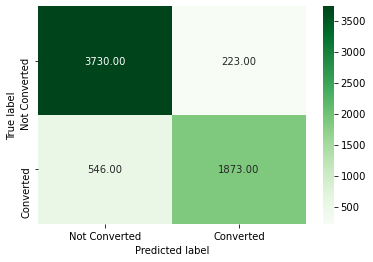

In [160]:
#Invoking the function

draw_cm( Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted)

In [161]:
# Let's take a look at the confusion matrix again

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted )
confusion

array([[3730,  223],
       [ 546, 1873]], dtype=int64)

### Measuring Accuracies

In [162]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted))

0.8793157564344005


In [163]:
print( metrics.classification_report( Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted ) )

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3953
           1       0.89      0.77      0.83      2419

    accuracy                           0.88      6372
   macro avg       0.88      0.86      0.87      6372
weighted avg       0.88      0.88      0.88      6372



### Metrics beyond simply accuracy

In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model:

TP / float(TP+FN)

0.774286895411327

In [166]:
# Let us calculate specificity:

TN / float(TN+FP)

0.9435871490007589

In [167]:
# Calculate false postive rate: 

print(FP/ float(TN+FP))

0.05641285099924108


In [168]:
# positive predictive value:

print (TP / float(TP+FP))

0.8936068702290076


In [169]:
# Negative predictive value:

print (TN / float(TN+ FN))

0.872310570626754


### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted_IND, Y_train_pred_final.Converted_Prob, drop_intermediate = False )

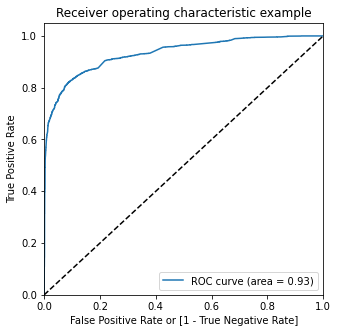

In [172]:
draw_roc(Y_train_pred_final.Converted_IND, Y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.721237          7962          1    1    1    1    1   
1              0        0.143532          5520          0    1    1    0    0   
2              0        0.112688          1962          0    1    1    0    0   
3              1        0.988164          1566          1    1    1    1    1   
4              0        0.131059          9170          0    1    1    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    1    1  
4    0    0    0    0    0    0

In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted_IND, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.680006  0.964448  0.505945
0.2   0.2  0.822976  0.907400  0.771313
0.3   0.3  0.869272  0.843737  0.884898
0.4   0.4  0.878688  0.811079  0.920061
0.5   0.5  0.879316  0.774287  0.943587
0.6   0.6  0.874608  0.735428  0.959777
0.7   0.7  0.867546  0.690368  0.975968
0.8   0.8  0.857815  0.646962  0.986845
0.9   0.9  0.840395  0.591567  0.992664


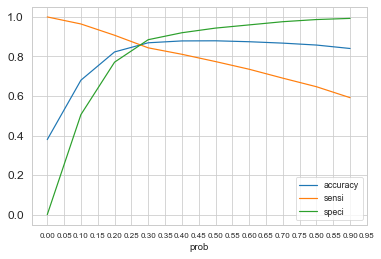

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

### From the curve above, 0.27 seems to be the optimum point to take it as a threshold.

In [176]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.27 else 0)

Y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.721237          7962          1    1    1    1    1   
1              0        0.143532          5520          0    1    1    0    0   
2              0        0.112688          1962          0    1    1    0    0   
3              1        0.988164          1566          1    1    1    1    1   
4              0        0.131059          9170          0    1    1    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    0    0                1  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    1    1    1    1    1    1                1  
4    0    0    0    0    0    0                0

In [177]:
# Let's check the overall accuracy.

metrics.accuracy_score(Y_train_pred_final.Converted_IND, Y_train_pred_final.final_predicted)

0.863308223477715

In [178]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted_IND, Y_train_pred_final.final_predicted )
confusion2

array([[3437,  516],
       [ 355, 2064]], dtype=int64)

In [179]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

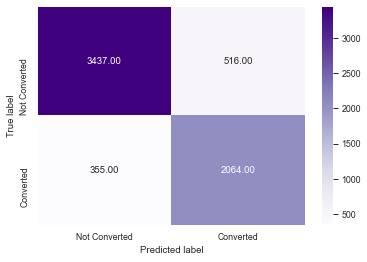

In [180]:
#Invoking the function

draw_cm( Y_train_pred_final.Converted_IND, Y_train_pred_final.final_predicted)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model:

TP / float(TP+FN)

0.8532451426209178

In [183]:
# Let us calculate specificity:

TN / float(TN+FP)

0.8694662281811283

In [184]:
# Calculate false postive rate - predicting churn when customer does not have churned:

print(FP/ float(TN+FP))

0.13053377181887174


In [185]:
# Positive predictive value:

print (TP / float(TP+FP))

0.8


In [186]:
# Negative predictive value:

print (TN / float(TN+ FN))

0.9063818565400844


### Precision and Recall

### Precision
  
    TP / TP + FP

In [187]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8

### Recall
 
    TP / TP + FN

In [188]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8532451426209178

Using sklearn utilities for the same

In [189]:
from sklearn.metrics import precision_score, recall_score

In [190]:
#Precision Value

precision_score(Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted)

0.8936068702290076

In [191]:
#Recall Value

recall_score(Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted)

0.774286895411327

### Precision and Recall trade-off
For our Business Problem, The appropriate Metrics to be used will be Recall and Precision.

Because this will help us to identify the predicted CONVERTED is actual CONVERTED and
Probability that an actual CONVERTED case is predicted correctly.
So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [192]:
from sklearn.metrics import precision_recall_curve

In [193]:
Y_train_pred_final.Converted_IND, Y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted_IND, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    0
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [194]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted_IND, Y_train_pred_final.Converted_Prob)

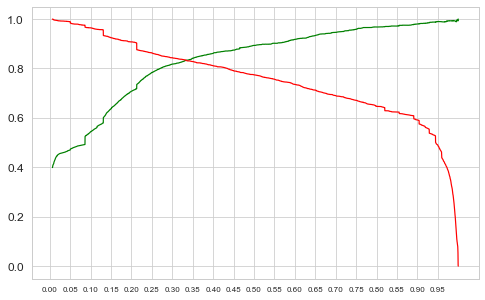

In [195]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

### INSIGHT: The Precission & Recall Trade Off seems to be 0.34 We will use this as threshold for Test data.

### From the curve above, 0.34 is the optimum point to take it as a threshold.

In [196]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

Y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.721237          7962          1    1    1    1    1   
1              0        0.143532          5520          0    1    1    0    0   
2              0        0.112688          1962          0    1    1    0    0   
3              1        0.988164          1566          1    1    1    1    1   
4              0        0.131059          9170          0    1    1    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    0    0                1  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    1    1    1    1    1    1                1  
4    0    0    0    0    0    0                0

In [197]:
# Let's check the overall accuracy

metrics.accuracy_score(Y_train_pred_final.Converted_IND, Y_train_pred_final.final_predicted)

0.873352165725047

In [198]:
confusion3 = metrics.confusion_matrix(Y_train_pred_final.Converted_IND, Y_train_pred_final.final_predicted )
confusion3

array([[3555,  398],
       [ 409, 2010]], dtype=int64)

In [199]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()
    

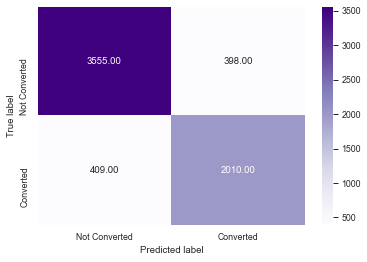

In [200]:
#Invoking the function
draw_cm( Y_train_pred_final.Converted_IND, Y_train_pred_final.final_predicted)

In [201]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8309218685407193

In [203]:
# Let us calculate specificity
TN / float(TN+FP)

0.899316974449785

In [204]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.10068302555021502


In [205]:
# Positive predictive value 
print (TP / float(TP+FP))

0.834717607973422


In [206]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8968213925327951


### Precision and Recall

    Precision
    TP / TP + FP

In [207]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.834717607973422

  
    Recall
    TP / TP + FN

In [208]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8309218685407193

## Making predictions on the test set

In [209]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 3504 to 5826
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               2731 non-null   float64
 1   Total Time Spent on Website               2731 non-null   int64  
 2   A free copy of Mastering The Interview    2731 non-null   int64  
 3   Lead Origin_Lead Add Form                 2731 non-null   uint8  
 4   Lead Origin_Lead Import                   2731 non-null   uint8  
 5   Lead Source_Google                        2731 non-null   uint8  
 6   Lead Source_Organic Search                2731 non-null   uint8  
 7   Lead Source_Referral Sites                2731 non-null   uint8  
 8   Last Activity_Email Bounced               2731 non-null   uint8  
 9   Last Activity_Email Link Clicked          2731 non-null   uint8  
 10  Last Activity_Email Opened       

In [210]:
X_test.head()

TotalVisits  Total Time Spent on Website  \
3504          3.0                          424   
4050          0.0                            0   
7201          2.0                          712   
1196          4.0                          423   
8219          7.0                          247   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
3504                                       1                          0   
4050                                       0                          1   
7201                                       1                          0   
1196                                       1                          0   
8219                                       1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
3504                        0                   0                           1   
4050                        0                   0                           0   
7201                        0                   0                           0   
1196                        0                   0                           1   
8219                        0                   0                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
3504                           0                            0   
4050                           0                            0   
7201                           0                            0   
1196                           0                            0   
8219                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3504                                 0                           1   
4050                                 0                           0   
7201                                 0                           0   
1196                                 0                           1   
8219                                 0                           0   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
3504                                        0                     0   
4050                                        0                     0   
7201                                        0                     0   
1196                                        0                     0   
8219                                        0                     0   

      Last Activity_Page Visited on Website  \
3504                                      0   
4050                                      0   
7201                                      0   
1196                                      0   
8219                                      1   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
3504                                       1                          0   
4050                                       1                          0   
7201                                       0                          0   
1196                                       0                          0   
8219                                       0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
3504                                  0                                     0   
4050                                  0                                     0   
7201                                  0                                     1   
1196                                  0                                     0   
8219                                  1                                     0   

      Specialization_Hospitality Management  \
3504                                      0   
4050                                      0   
7201                                      0   
1196                                      0   
8219                                      0   

      Specialization_Hum

In [211]:
# Scaling the Test Set

X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [212]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
3504                    -0.103815                          0   
4050                    -0.881052                          1   
7201                     0.424120                          0   
1196                    -0.105648                          0   
8219                    -0.428274                          0   

      Lead Origin_Lead Import  Lead Source_Referral Sites  \
3504                        0                           0   
4050                        0                           0   
7201                        0                           0   
1196                        0                           0   
8219                        0                           0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3504                            0                                 0   
4050                            0                                 0   
7201                            0                                 0   
1196                            0                                 0   
8219                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
3504                           1                                        0   
4050                           0                                        0   
7201                           0                                        0   
1196                           1                                        0   
8219                           0                                        0   

      Last Activity_Page Visited on Website  \
3504                                      0   
4050                                      0   
7201                                      0   
1196                                      0   
8219                                      1   

      Specialization_Healthcare Management  Specialization_Travel and Tourism  \
3504                                     0                                  0   
4050                                     0                                  0   
7201                                     1                                  0   
1196                                     0                                  1   
8219                                     0                                  0   

      Tags_Interested in other courses  Tags_Ringing  \
3504                                 0             1   
4050                                 0             0   
7201                                 0             0   
1196                                 0             1   
8219                                 0             0   

      Tags_Will revert after reading the email  Last Notable Activity_Modified  
3504                                         0                               0  
4050                                         1                               0  
7201                                         0                               0  
1196                                         0                               0  
8219                                         0                               0

In [213]:
X_test_sm = sm.add_constant(X_test)

In [214]:
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [215]:
# Removing 'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
#          'Specialization_Healthcare Management' & 'Specialization_International Business'

# These columns were removed during train model building exercise

X_test_sm=X_test_sm[['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']]

### Making predictions

In [216]:
# Predicting the final test model

Y_test_pred = logm6_model.predict(X_test_sm)

In [217]:
Y_test_pred[:10]

3504    0.011648
4050    0.999318
7201    0.485662
1196    0.005413
8219    0.143697
8747    0.131059
9048    0.760126
6524    0.113216
7693    0.259313
8187    0.464941
dtype: float64

In [218]:
# Converting y_pred to a dataframe which is an array
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [219]:
# Let's see the head
Y_pred_1.head()

0
3504  0.011648
4050  0.999318
7201  0.485662
1196  0.005413
8219  0.143697

In [220]:
# Converting Y_test to dataframe

Y_test_df = pd.DataFrame(Y_test)

In [221]:
Y_test_df.head()

Converted
3504          0
4050          1
7201          0
1196          0
8219          1

In [222]:
# Putting CustID to index

Y_test_df['Prospect_IND'] = Y_test_df.index

In [223]:
# Removing index for both dataframes to append them side by side

Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [224]:
# Appending Y_test_df and Y_pred_1

Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [225]:
Y_pred_final.head()

Converted  Prospect_IND         0
0          0          3504  0.011648
1          1          4050  0.999318
2          0          7201  0.485662
3          0          1196  0.005413
4          1          8219  0.143697

In [226]:
# Renaming the column 

Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
Y_pred_final= Y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [227]:
# Rearranging the columns

Y_pred_final = Y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

#### Let's see the head of Y_pred_final

In [228]:
Y_pred_final.head()

Prospect_IND  Converted_IND  Converted_Prob
0          3504              0        0.011648
1          4050              1        0.999318
2          7201              0        0.485662
3          1196              0        0.005413
4          8219              1        0.143697

#### NOTE: We will use the Threshold 0.34 we got it from Precission & Recall Tradeoff exercise:

In [229]:
Y_pred_final['final_predicted'] = Y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [230]:
Y_pred_final.head()

Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0          3504              0        0.011648                0
1          4050              1        0.999318                1
2          7201              0        0.485662                1
3          1196              0        0.005413                0
4          8219              1        0.143697                0

### Overall Accuracy of the Model

In [231]:
# Let's check the overall accuracy.

metrics.accuracy_score(Y_pred_final.Converted_IND, Y_pred_final.final_predicted)

0.8773343097766386

### Confusion Matrix (Test Predict)

In [232]:
confusion_final = metrics.confusion_matrix(Y_pred_final.Converted_IND, Y_pred_final.final_predicted )
confusion_final

array([[1525,  164],
       [ 171,  871]], dtype=int64)

In [233]:
def draw_cm( actual, predicted ): 
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="terrain",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

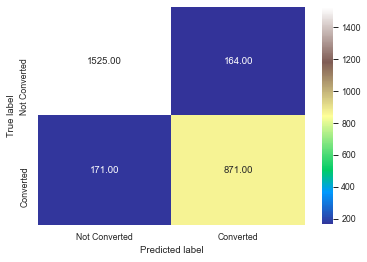

In [234]:
#Invoking the function

draw_cm( Y_pred_final.Converted_IND, Y_pred_final.final_predicted )

In [235]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

### Sensitivity

In [236]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8358925143953935

### Specificity

In [237]:
# Let us calculate specificity
TN / float(TN+FP)

0.9029011249259917

In [238]:
Y_test=Y_pred_final["Converted_IND"]
Y_test

0       0
1       1
2       0
3       0
4       1
       ..
2726    0
2727    0
2728    0
2729    1
2730    1
Name: Converted_IND, Length: 2731, dtype: int64

### Precision and Recall

  Precision
  
  TP / TP + FP

In [239]:
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.8415458937198068

Recall

TP / TP + FN

In [240]:
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])

0.8358925143953935

### ROC curve (Area Under Curve)


In [241]:

# Function to draw ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [242]:
fpr, tpr, thresholds = metrics.roc_curve(Y_pred_final.Converted_IND,
                                         Y_pred_final.Converted_Prob, drop_intermediate=False)

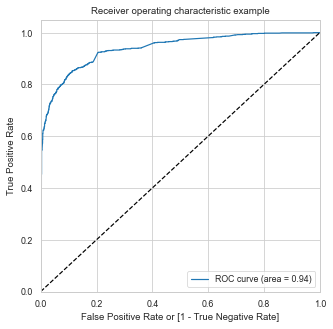

In [243]:
# Invoking the functio to draw ROC curve

draw_roc( Y_pred_final.Converted_IND, Y_pred_final.Converted_Prob)

### Lead Scoring

In [244]:
Y_pred_final

Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0             3504              0        0.011648                0
1             4050              1        0.999318                1
2             7201              0        0.485662                1
3             1196              0        0.005413                0
4             8219              1        0.143697                0
...            ...            ...             ...              ...
2726          6508              0        0.011300                0
2727           315              0        0.006455                0
2728          3766              0        0.077154                0
2729          8043              1        0.648726                1
2730          5826              1        0.977769                1

[2731 rows x 4 columns]

In [245]:
Y_pred_final['lead_score']=(Y_pred_final['Converted_Prob']*100).astype("int64")
Y_pred_final.sort_values(by='lead_score',ascending=False)

Prospect_IND  Converted_IND  Converted_Prob  final_predicted  lead_score
1557          2804              1        0.999318                1          99
1689           493              1        0.998779                1          99
1758          8677              1        0.991123                1          99
836           7326              1        0.998779                1          99
837           4771              1        0.999318                1          99
...            ...            ...             ...              ...         ...
1115          1608              0        0.004313                0           0
2204          6611              0        0.001213                0           0
1119          9131              0        0.008945                0           0
1120          1342              1        0.003757                0           0
1202          7502              0        0.005270                0           0

[2731 rows x 5 columns]

### Observation:
After running the model on the Test Data these are the figures we obtain:

     Accuracy    :    87.73%
     Sensitivity :    83.58%
     Specificity :    90.29%
     Precision   :    84.50%
     Recall      :    83.58%

### Conclusion:

    ~84% of Recall value indicates that our model is able to predict 84% of actual conversion cases correctly


    ~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.